# Integrative Analysis with TCGA Data

Analysis of Mutation Data from The Cancer Genome Atlas (TCGA)

In [ ]:
#| include: false
library(knitr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Introduction

The Cancer Genome Atlas (TCGA) is a massive cancer genomics project compiling high-throughput multi-omic data on dozens of cancer types for [public access](https://www.cancer.gov/ccg/research/genome-sequencing/tcga).

We are gonna use the `curatedTCGAData` package to manipulate locally to multiple high-throughput datasets from the project. The package provides access to TCGA data that has been curated and stored as a *MultiAssayExperiment* object on the Bioconductor [ExperimentHub](https://bioconductor.org/packages/release/bioc/html/ExperimentHub.html).

First, let’s load the packages needed.

In [ ]:
library(curatedTCGAData)

Loading required package: MultiAssayExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'

The following object is masked from 'package:dplyr':

    count


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors


Attaching package: 'S4Vectors'

The following objects are masked from 'package:lubridate':

    second, second<-

The following objects are masked from 'package:dplyr':

    first, rename

The following object is masked from 'package:tidyr':

    expand

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required package: IRanges


Attaching package: 'IRanges'

The following object is masked from 'package:lubridate':

    %within%

The following objects are masked from 'package:dplyr':

    collapse, desc, slice

The following object is masked from 'package:purrr':

    reduce

The following object is masked from 'package:grDevices':

    windows

Loading required package: GenomeInfoDb

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'Biobase'

The following object is masked from 'package:MatrixGenerics':

    rowMedians

The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians

## Download the Data

To download the data we need to use `curatedTCGAData`function. The first argument is a four letter disease (cancer) code (A complete list of disease codes used by the TCGA project are available on the [NCI Genomic Data Commons website](https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations)), the second argument is a vector of data types we want to download. We need to specify `dry.run = FALSE` to download the data.

In this specific case, we are gonna work with RNA-Seq data, mutation data and methylation data from Rectum Adenocarcinoma (READ). The clinical data is included by default.

In [ ]:
#| message: false
#| warning: false
#| label: read-data

readData = curatedTCGAData("READ", 
                           c("RNASeq2GeneNorm", "Mutation", "Methylation_methyl450"), 
                           dry.run = FALSE, version = "2.1.1")

Working on: READ_Mutation-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

require("RaggedExperiment")

Working on: READ_RNASeq2GeneNorm-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

Working on: READ_Methylation_methyl450-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

require("rhdf5")

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

Loading required package: HDF5Array

Loading required package: DelayedArray

Loading required package: Matrix


Attaching package: 'Matrix'

The following object is masked from 'package:S4Vectors':

    expand

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: S4Arrays

Loading required package: abind


Attaching package: 'S4Arrays'

The following object is masked from 'package:abind':

    abind

The following object is masked from 'package:base':

    rowsum

Loading required package: SparseArray


Attaching package: 'DelayedArray'

The following object is masked from 'package:purrr':

    simplify

The following objects are masked from 'package:base':

    apply, scale, sweep


Attaching package: 'HDF5Array'

The following object is masked from 'package:rhdf5':

    h5ls

Working on: READ_colData-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

Working on: READ_sampleMap-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

Working on: READ_metadata-20160128

see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentation

loading from cache

harmonizing input:
  removing 1903 sampleMap rows not in names(experiments)
  removing 2 colData rownames not in sampleMap 'primary'

A MultiAssayExperiment object of 3 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 3:
 [1] READ_Mutation-20160128: RaggedExperiment with 22075 rows and 69 columns
 [2] READ_RNASeq2GeneNorm-20160128: SummarizedExperiment with 18115 rows and 177 columns
 [3] READ_Methylation_methyl450-20160128: SummarizedExperiment with 485577 rows and 106 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

## Review the Clinical Metadata

We can see which patients have data for each assay. The assay column gives the experiment type, the primary column gives the unique patient ID and the colname gives the sample ID used as a identifier within a given experiment.

In [ ]:
sampleMap(readData)

DataFrame with 352 rows and 3 columns
                                  assay      primary                colname
                               <factor>  <character>            <character>
1   READ_Methylation_methyl450-20160128 TCGA-AF-2687 TCGA-AF-2687-01A-02D..
2   READ_Methylation_methyl450-20160128 TCGA-AF-2690 TCGA-AF-2690-01A-02D..
3   READ_Methylation_methyl450-20160128 TCGA-AF-2693 TCGA-AF-2693-01A-02D..
4   READ_Methylation_methyl450-20160128 TCGA-AF-3911 TCGA-AF-3911-01A-01D..
5   READ_Methylation_methyl450-20160128 TCGA-AF-4110 TCGA-AF-4110-01A-02D..
...                                 ...          ...                    ...
348       READ_RNASeq2GeneNorm-20160128 TCGA-AG-A02G        TCGA-AG-A02G-01
349       READ_RNASeq2GeneNorm-20160128 TCGA-AG-A02N        TCGA-AG-A02N-01
350       READ_RNASeq2GeneNorm-20160128 TCGA-AG-A02X        TCGA-AG-A02X-01
351       READ_RNASeq2GeneNorm-20160128 TCGA-AG-A032        TCGA-AG-A032-01
352       READ_RNASeq2GeneNorm-20160128 TCGA-AG-A0

Not all patients have data for all assays, and some of them can have multiple data entries for one or more experiment type. This may correspond to multiple biopsies or matched tumor and normal samples from an individual patient.

In [ ]:
sampleMap(readData) |> 
  as_tibble() |> 
  pull(primary) |> 
  table() |> 
  table()


  1   2   3   4 
  5 147   7   8 

We can see the metadata of the patients with `colData`. Note that there are more than 2000 columns of data per patient (not necessarily complete).

In [ ]:
clin = colData(readData) |> 
  as_tibble()
dim(clin)

[1]  167 2260

 [1] "patientID"             "years_to_birth"        "vital_status"         
 [4] "days_to_death"         "days_to_last_followup" "tumor_tissue_site"    
 [7] "pathologic_stage"      "pathology_T_stage"     "pathology_N_stage"    
[10] "pathology_M_stage"    

As an example, for rectum adenocarcinoma, we can see the tumor stage.

In [ ]:
clin |> 
  pull(pathology_T_stage) |> 
  table()


 t1  t2  t3  t4 t4a t4b 
  9  28 114   5   8   1 

Stage T4 have subgroups. To simplify the analysis, let’s combine all T4 tumors.

In [ ]:
clin <- clin |> 
  mutate(t_stage = case_when(
    pathology_T_stage %in% c("t4","t4a","t4b") ~ "t4",
    .default = pathology_T_stage
  ))

clin$t_stage |> 
  table()


 t1  t2  t3  t4 
  9  28 114  14 

Also, we can see the vital status (alive=0, deceased=1)

In [ ]:
clin$vital_status |> 
  table()


  0   1 
139  28 

Or combine tumor status and vital status.

In [ ]:
table(clin$t_stage, clin$vital_status)

    
      0  1
  t1  9  0
  t2 24  4
  t3 96 18
  t4  9  5

## Analyzing Mutation Data

Let’s begin analyzing the mutation data. Below is the code to retrieve the mutation data.

In [ ]:
mut_data = readData[[1]]

mut_data

class: RaggedExperiment 
dim: 22075 69 
assays(34): Hugo_Symbol Entrez_Gene_Id ... COSMIC_Gene Drug_Target
rownames: NULL
colnames(69): TCGA-AF-2689-01A-01W-0831-10 TCGA-AF-2691-01A-01W-0831-10
  ... TCGA-AG-A032-01 TCGA-AG-A036-01
colData names(0):

From the inspection of the sample IDs we can see that the mutation colnames match to the **primary** column from he clinical data.

In [ ]:
mut_sample_ids = colnames(mut_data)
head(mut_sample_ids)

[1] "TCGA-AF-2689-01A-01W-0831-10" "TCGA-AF-2691-01A-01W-0831-10"
[3] "TCGA-AF-2692-01A-01W-0831-10" "TCGA-AF-3400-01A-01W-0831-10"
[5] "TCGA-AF-3913-01"              "TCGA-AG-3574-01A-01W-0831-10"

[1] "TCGA-AF-2687" "TCGA-AF-2689" "TCGA-AF-2690" "TCGA-AF-2691" "TCGA-AF-2692"
[6] "TCGA-AF-2693"

We need to manipulate these by substracting 12 characters.

In [ ]:
mut_sample_ids <- mut_sample_ids |> 
  stringr::str_sub(1,12)

all(mut_sample_ids %in% clin$patientID)

[1] TRUE

Is important to note that the data stored in `assay(mut_data)` is difficult to work with because is a sparse matrix that has a row for each `GRanges` with a mutation in at least one sample.

In [ ]:
assay(mut_data)[1:3,1:3]

                      TCGA-AF-2689-01A-01W-0831-10 TCGA-AF-2691-01A-01W-0831-10
X:54241715-54241716:+ "WNK3"                       NA                          
7:111899511:+         "IFRD1"                      NA                          
7:113309556:+         "PPP1R3A"                    NA                          
                      TCGA-AF-2692-01A-01W-0831-10
X:54241715-54241716:+ NA                          
7:111899511:+         NA                          
7:113309556:+         NA                          


WNK3 <NA> 
   1   68 

We can get more information if we look at the mutation information for each patient.

In [ ]:
mut_assay = mut_data@assays

mut_assay # GRangesList

GRangesList object of length 69:
$`TCGA-AF-2689-01A-01W-0831-10`
GRanges object with 64 ranges and 34 metadata columns:
       seqnames            ranges strand | Hugo_Symbol Entrez_Gene_Id
          <Rle>         <IRanges>  <Rle> | <character>    <character>
   [1]        X 54241715-54241716      + |        WNK3          65267
   [2]        7         111899511      + |       IFRD1           3475
   [3]        7         113309556      + |     PPP1R3A           5506
   [4]        7         128146325      + |     FAM71F1          84691
   [5]        7         156447624      + |        NOM1          64434
   ...      ...               ...    ... .         ...            ...
  [60]       10          50616059      + |       OGDHL          55753
  [61]       10          96343335      + |       HELLS           3070
  [62]        5         139173166      + |        PSD2          84249
  [63]        5         147800932      + |      FBXO38          81545
  [64]        5          54365356      +

[1] "CompressedGRangesList"
attr(,"package")
[1] "GenomicRanges"

[1] 69

Let’s inspect the data from the first patient. We can see from the metadata information the Hugo Symbol, mutation status and predicted effect of each mutation at variant classification.

In [ ]:
mut_assay[[1]]

GRanges object with 64 ranges and 34 metadata columns:
       seqnames            ranges strand | Hugo_Symbol Entrez_Gene_Id
          <Rle>         <IRanges>  <Rle> | <character>    <character>
   [1]        X 54241715-54241716      + |        WNK3          65267
   [2]        7         111899511      + |       IFRD1           3475
   [3]        7         113309556      + |     PPP1R3A           5506
   [4]        7         128146325      + |     FAM71F1          84691
   [5]        7         156447624      + |        NOM1          64434
   ...      ...               ...    ... .         ...            ...
  [60]       10          50616059      + |       OGDHL          55753
  [61]       10          96343335      + |       HELLS           3070
  [62]        5         139173166      + |        PSD2          84249
  [63]        5         147800932      + |      FBXO38          81545
  [64]        5          54365356      + |        GZMK           3003
             Center  NCBI_Build Var

 [1] "WNK3"     "IFRD1"    "PPP1R3A"  "FAM71F1"  "NOM1"     "TRIM73"  
 [7] "C7orf51"  "DIDO1"    "DNMT1"    "CALR"     "SIN3B"    "ZNF569"  
[13] "SIGLEC12" "ZNF160"   "NLRP4"    "ENPP2"    "TRPA1"    "MMP16"   
[19] "GPR89A"   "SLC9A11"  "PAX7"     "PLA2G5"   "SLC26A9"  "PIK3R3"  
[25] "LPPR4"    "BCL9L"    "PRDM11"   "PEX3"     "DCDC2"    "KRT20"   
[31] "TP53"     "CDH8"     "SF3B3"    "SLC9A10"  "SLC7A14"  "NLGN1"   
[37] "MYRIP"    "CYP8B1"   "TGM4"     "COL7A1"   "P2RX7"    "KRAS"    
[43] "TPH2"     "ANO4"     "UBR1"     "LBXCOR1"  "PDLIM5"   "ODZ1"    
[49] "SMARCA1"  "CNKSR2"   "RBM10"    "RBM3"     "HUWE1"    "CYLC1"   
[55] "ATP6V1E2" "ASTN2"    "TAF1L"    "SGCG"     "GBF1"     "OGDHL"   
[61] "HELLS"    "PSD2"     "FBXO38"   "GZMK"    


Somatic 
     64 


  Frame_Shift_Ins Missense_Mutation Nonsense_Mutation            Silent 
                1                39                 5                19 

Now, is kind of a trouble to inspect manually each patient. So, lets get all mutation information from Hugo symbol and Variant classification for all the patients.

In [ ]:
var_class_df = mapply(function(sample_id, mutation_assay){
  
  d = mcols(mutation_assay)[,c("Hugo_Symbol","Variant_Classification")] |> 
    as.data.frame()
  
  colnames(d) = c("symbol","variant_class")
  
  d$patientID = sample_id
  
  return(d)
  
}, sample_id=mut_sample_ids, mutation_assay = mut_assay,SIMPLIFY = F, USE.NAMES = F)


var_class_df = do.call(rbind, var_class_df)


head(var_class_df)

   symbol     variant_class    patientID
1    WNK3   Frame_Shift_Ins TCGA-AF-2689
2   IFRD1 Missense_Mutation TCGA-AF-2689
3 PPP1R3A Missense_Mutation TCGA-AF-2689
4 FAM71F1            Silent TCGA-AF-2689
5    NOM1 Missense_Mutation TCGA-AF-2689
6  TRIM73 Nonsense_Mutation TCGA-AF-2689

We can visualize the most common mutated genes genes in rectum adenocarcinoma

In [ ]:
#| label: fig-genesmut
#| message: false
#| warning: false

p <- var_class_df |> 
  as_tibble() |> 
  group_by(symbol,variant_class) |> 
  summarise(n = n()) |> 
  arrange(desc(n)) |> 
  ungroup() |> 
  slice_max(order_by = n, n = 20) |> 
  ungroup() |> 
  mutate(symbol = fct_reorder(symbol,n)) |> 
  ggplot(aes(n, symbol,fill=variant_class)) +
  geom_col() +
  facet_wrap(~variant_class) +
  paletteer::scale_fill_paletteer_d("awtools::a_palette") +
  labs(x = "Samples with specific mutation", y="Gene Symbol", fill="Variant Class",
       title="Top 20 Samples with READ")

`summarise()` has grouped output by 'symbol'. You can override using the
`.groups` argument.

Saving 7 x 5 in image

<figure>
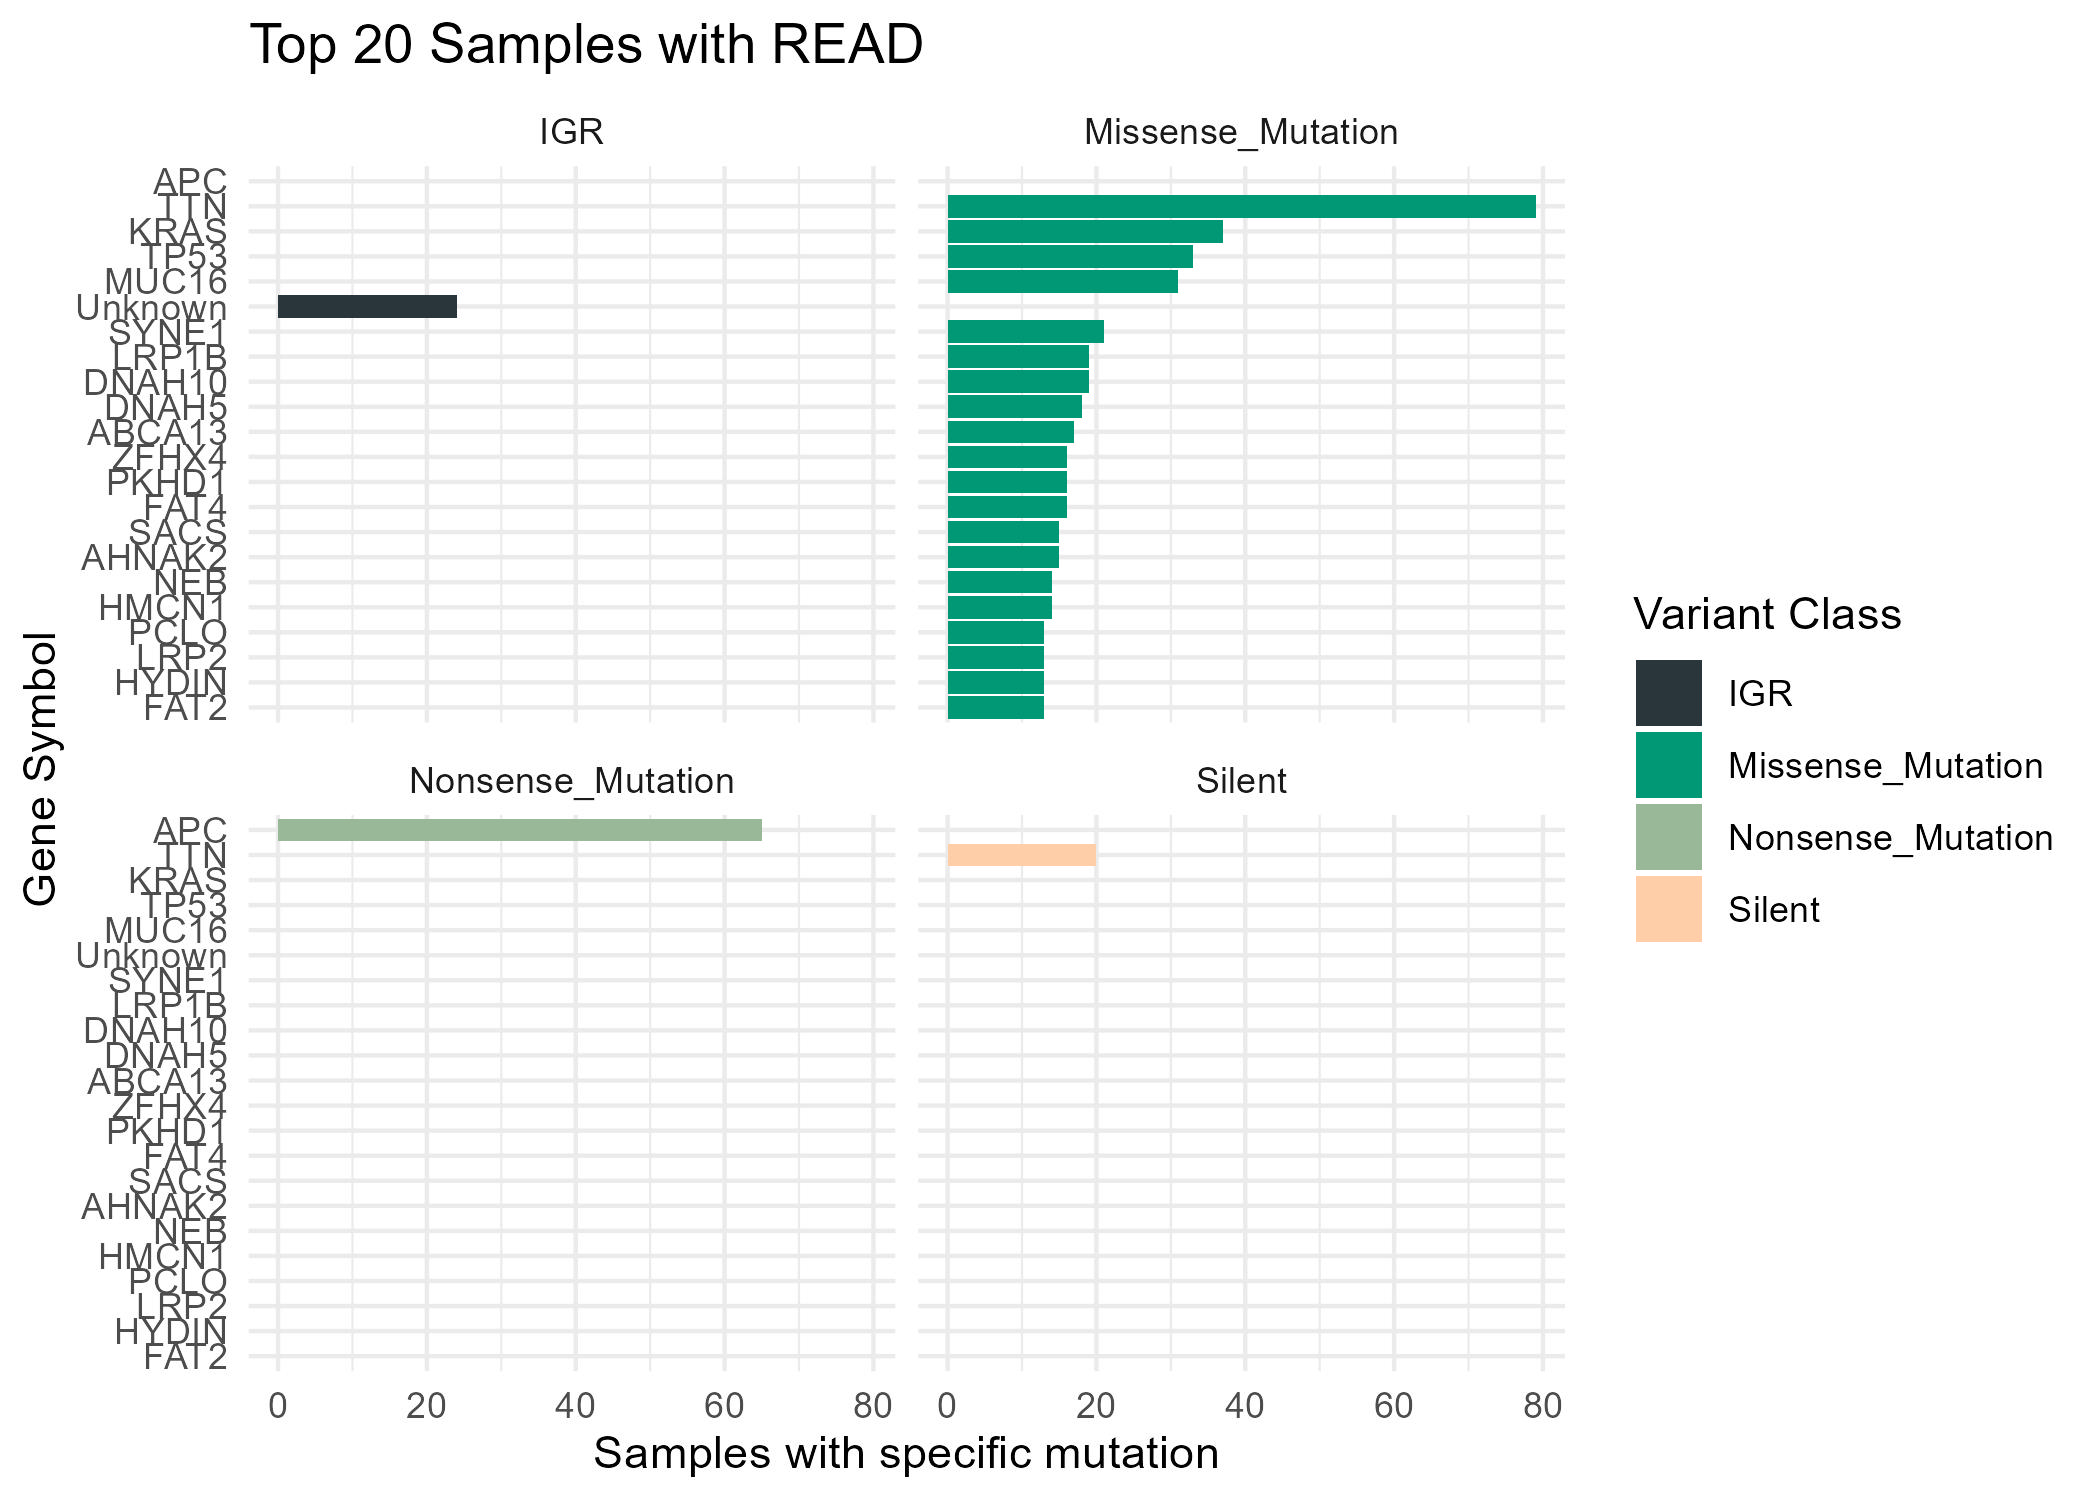
<figcaption aria-hidden="true">Samples with specific mutation per gene</figcaption>
</figure>